<a href="https://colab.research.google.com/github/ArpanChaudhary/ML_Project/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Gender'].isna().sum()

0

In [9]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [10]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Married'].isna().sum()

0

In [11]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [12]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Dependents'].isna().sum()

0

In [13]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [14]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['Self_Employed'].isna().sum()

0

In [15]:
df['LoanAmount'].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [17]:
df['LoanAmount'].isna().sum()

0

In [18]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [19]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Loan_Amount_Term'].isna().sum()

0

In [20]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

df['Credit_History'].isna().sum()

0

In [21]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lab_enc = LabelEncoder()

In [25]:
df['Loan_ID'] = lab_enc.fit_transform(df['Loan_ID'])

df['Gender'] = lab_enc.fit_transform(df['Gender'])

df['Married'] = lab_enc.fit_transform(df['Married'])

df['Dependents'] = lab_enc.fit_transform(df['Dependents'] )

df['Education'] = lab_enc.fit_transform(df['Education'])

df['Self_Employed'] = lab_enc.fit_transform(df['Self_Employed'])

df['Property_Area'] = lab_enc.fit_transform(df['Property_Area'])

df['Loan_Status'] = lab_enc.fit_transform(df['Loan_Status'])

In [26]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

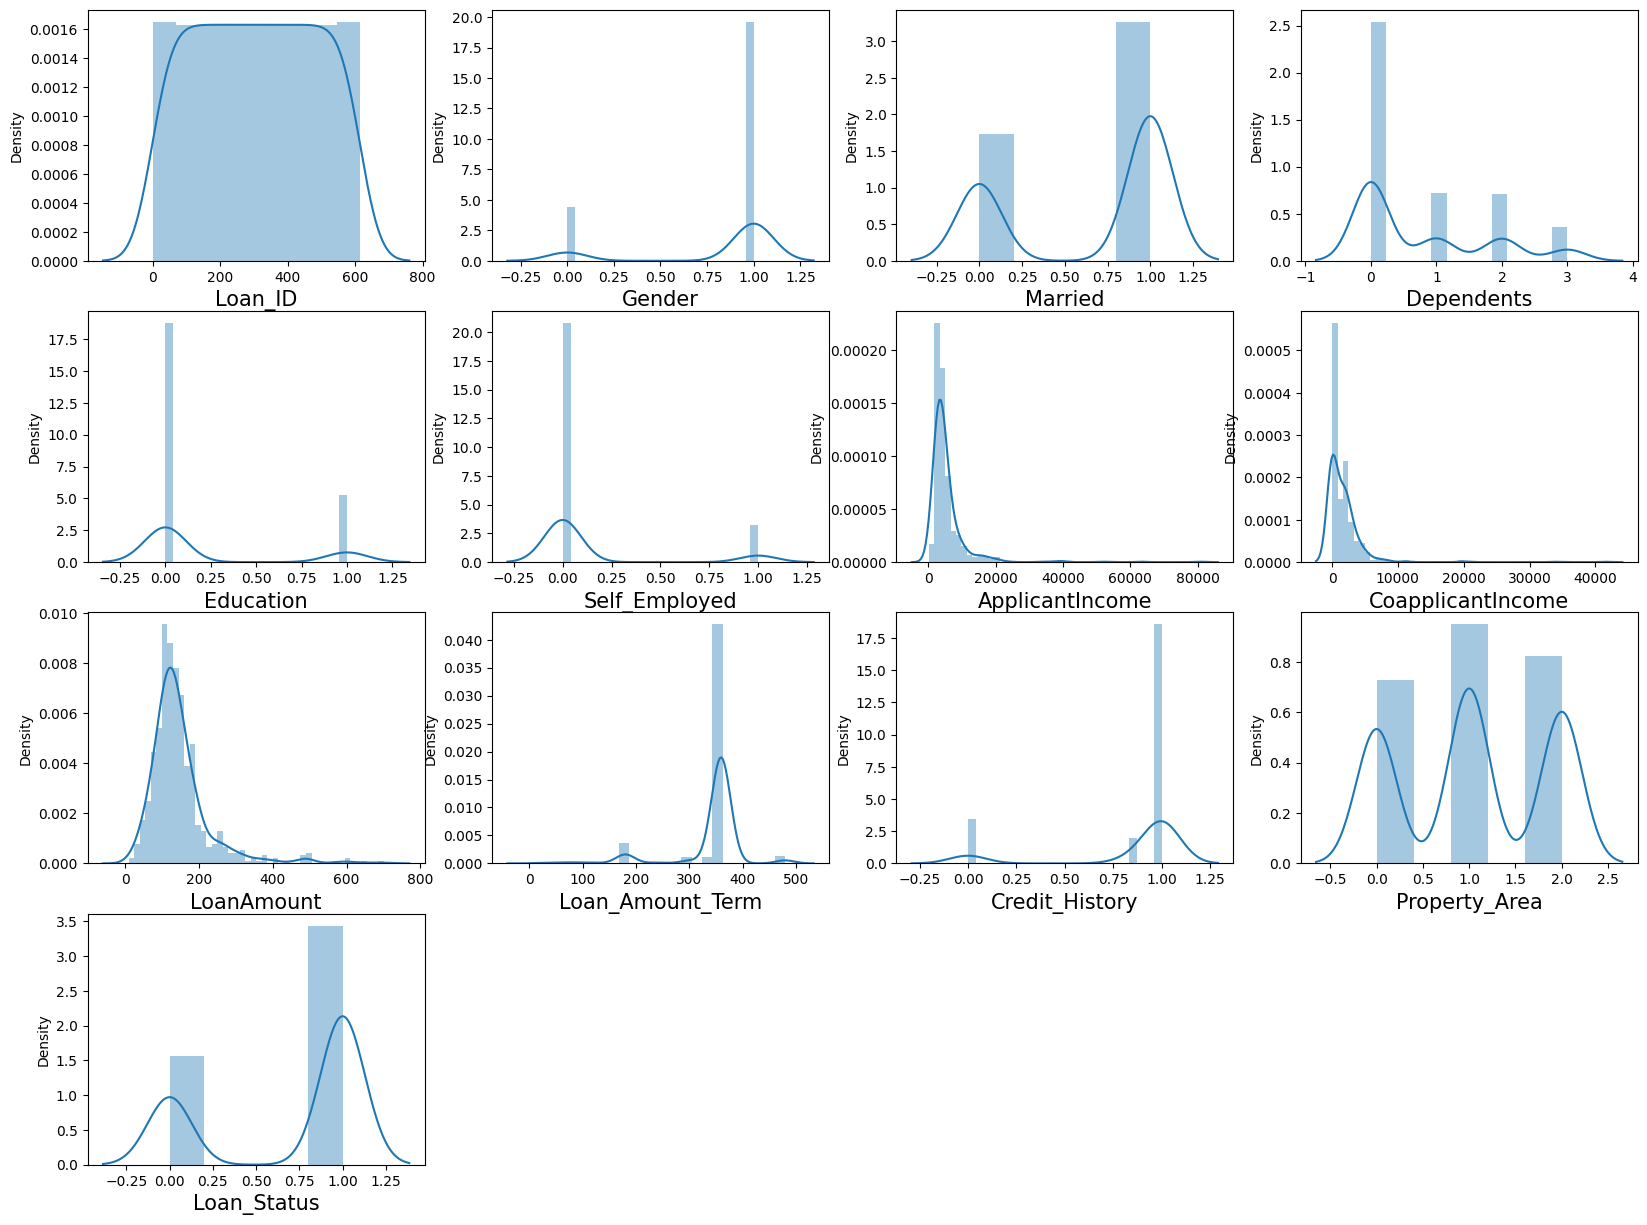

In [28]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
  if plotnumber <= 14:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1

plt.show()

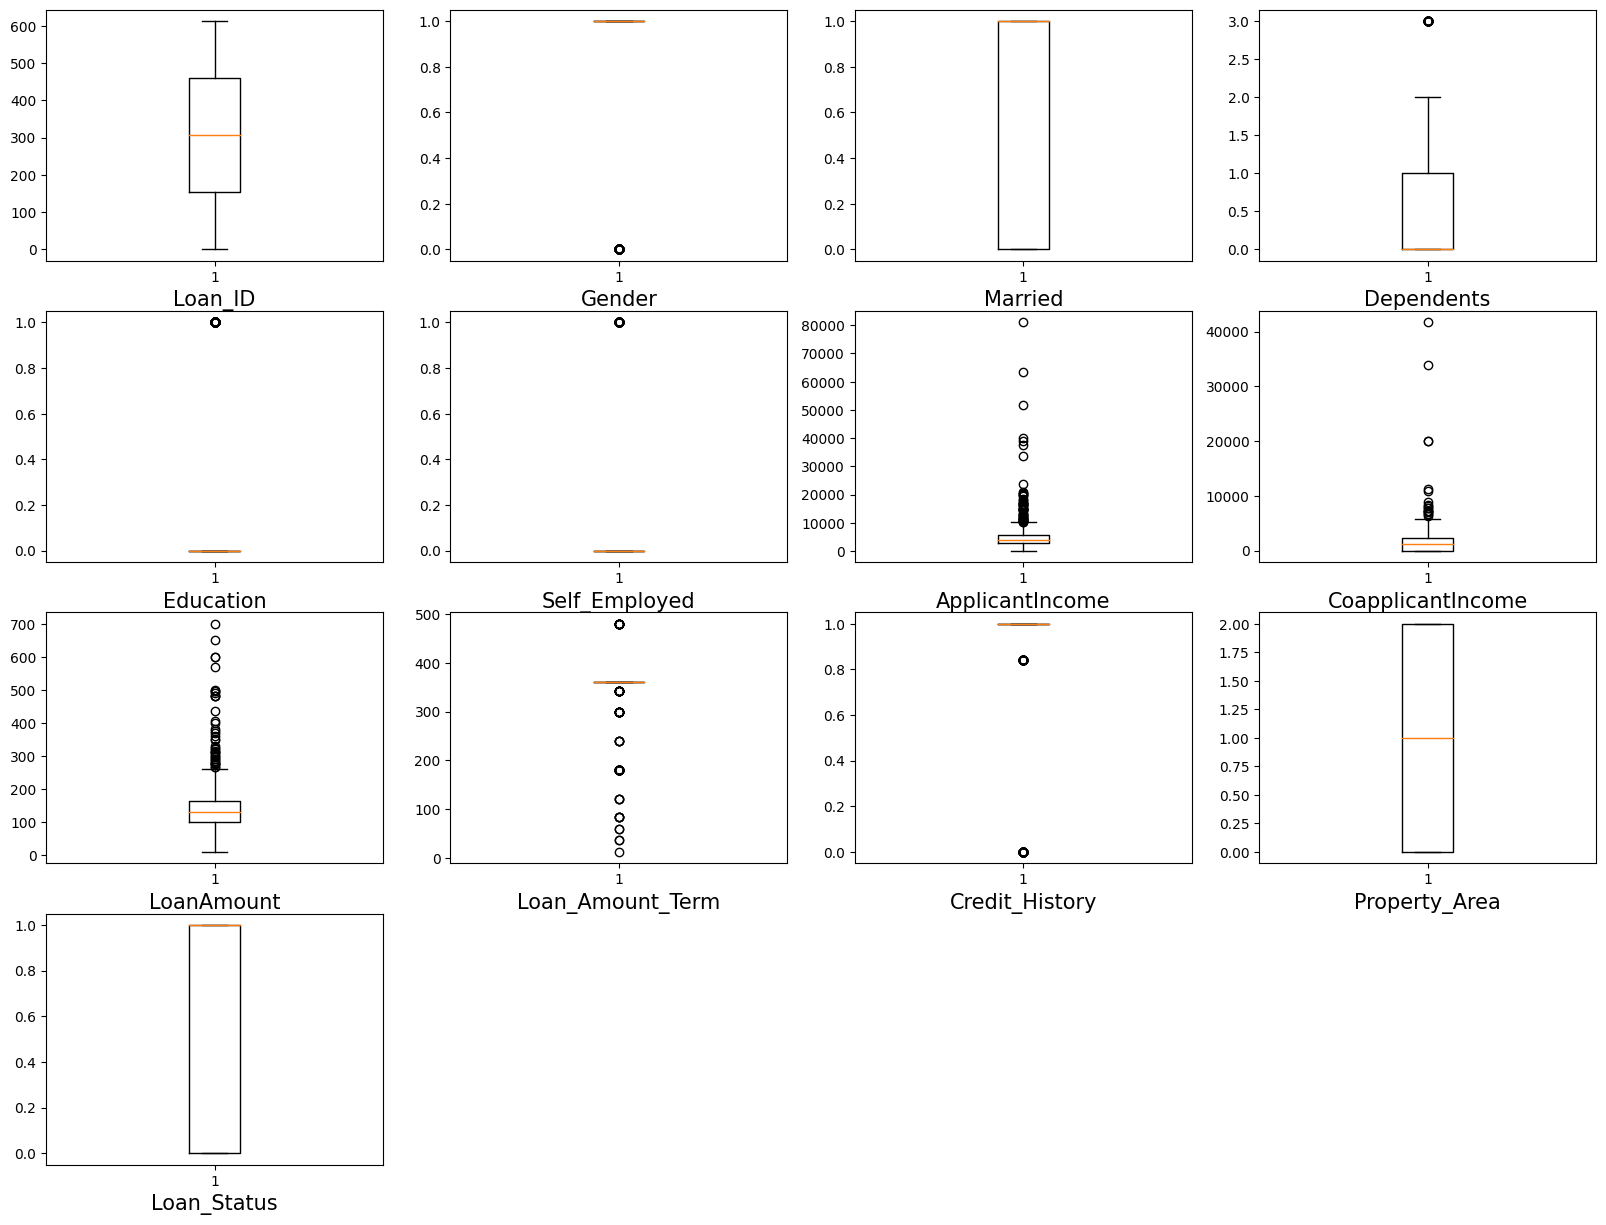

In [29]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
  if plotnumber <= 14:
    ax = plt.subplot(4,4,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1

plt.show()

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

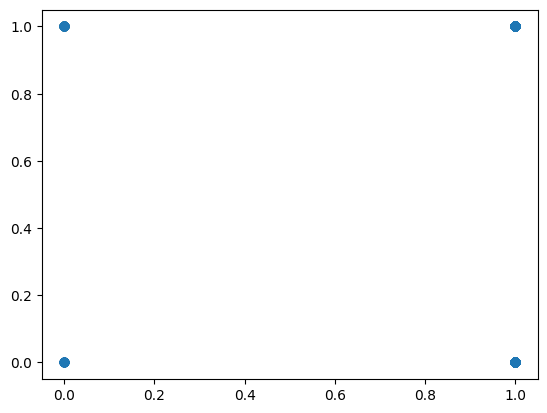

In [31]:
plt.scatter(x='Gender',y='Loan_Status',data=df)

plt.show()

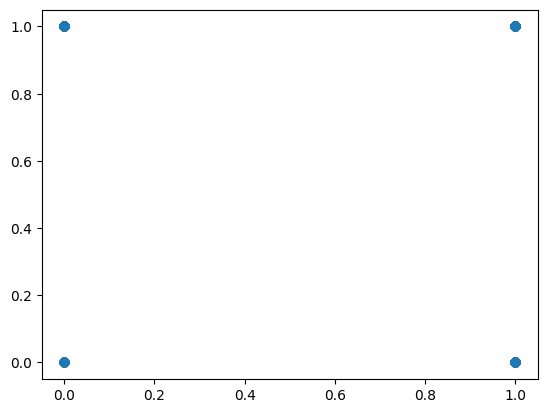

In [32]:
plt.scatter(x='Married',y='Loan_Status',data=df)

plt.show()

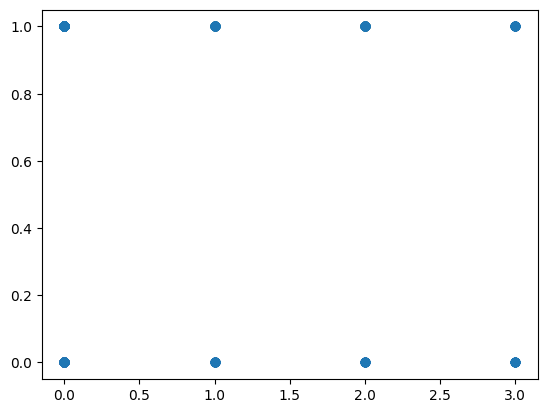

In [33]:
plt.scatter(x='Dependents',y='Loan_Status', data=df)

plt.show()

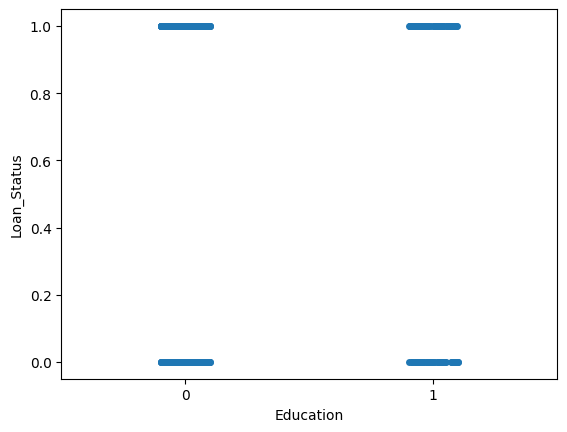

In [34]:
sns.stripplot(x='Education',y='Loan_Status', data=df)

plt.show()

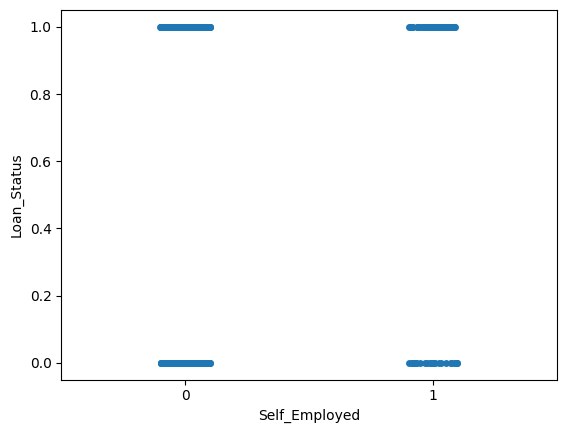

In [35]:
sns.stripplot(x='Self_Employed',y='Loan_Status', data=df)

plt.show()

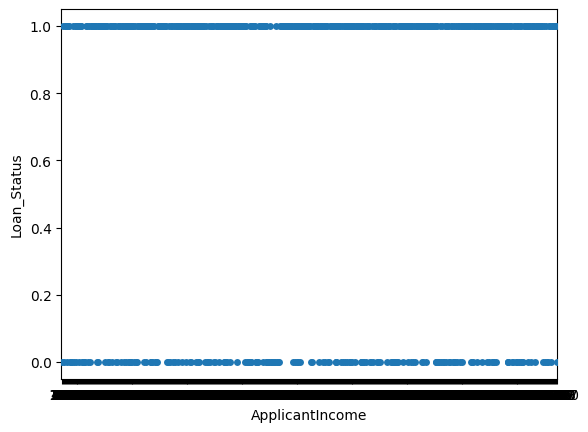

In [36]:
sns.stripplot(x='ApplicantIncome',y='Loan_Status', data=df)

plt.show()

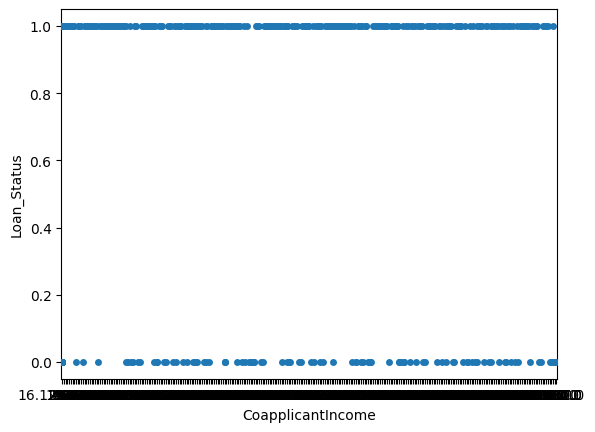

In [37]:
sns.stripplot(x='CoapplicantIncome',y='Loan_Status', data=df)

plt.show()

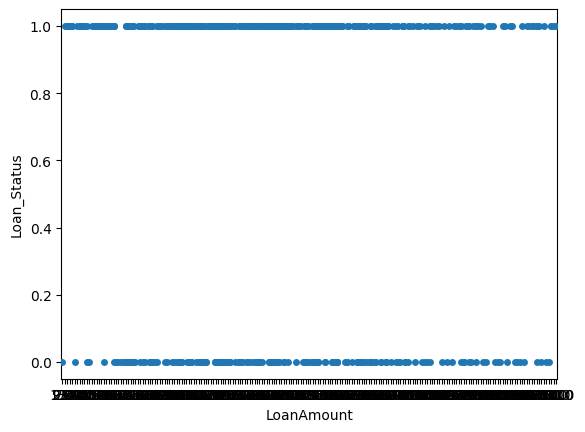

In [38]:
sns.stripplot(x='LoanAmount',y='Loan_Status', data=df)

plt.show()

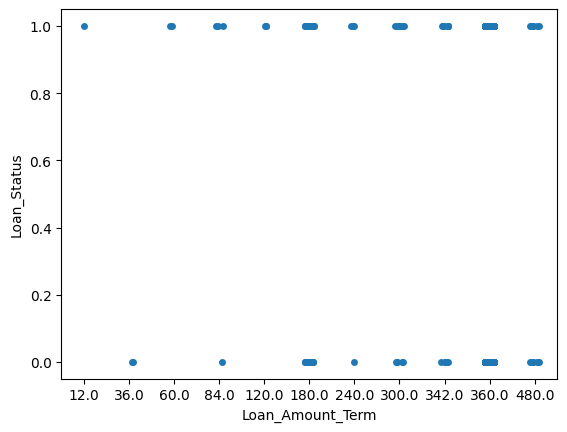

In [39]:
sns.stripplot(x='Loan_Amount_Term',y='Loan_Status', data=df)

plt.show()

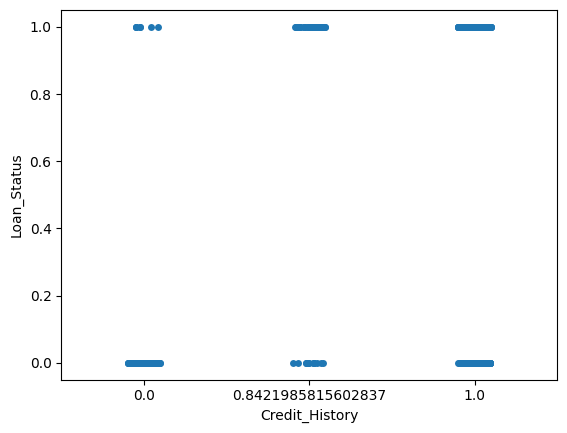

In [40]:
sns.stripplot(x='Credit_History',y='Loan_Status', data=df)

plt.show()

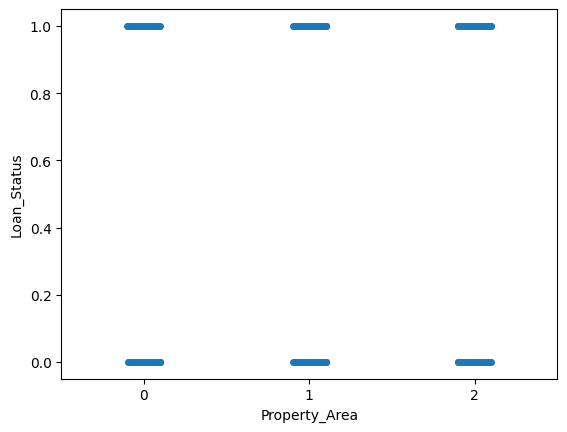

In [41]:
sns.stripplot(x='Property_Area',y='Loan_Status', data=df)

plt.show()

In [42]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [43]:
ai_high = (q3.ApplicantIncome + (1.5*iqr.ApplicantIncome))
ai_high

10171.25

In [44]:
index = np.where(df['ApplicantIncome'] > ai_high)
index

(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
        146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
        324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
        487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604]),)

In [45]:
df = df.drop(df.index[index])
df.shape

(564, 13)

In [46]:
ai_low = (q1.ApplicantIncome - (1.5 * iqr.ApplicantIncome))
ai_low

-1498.75

In [47]:
index = np.where(df['ApplicantIncome'] < ai_low)
index

(array([], dtype=int64),)

In [48]:
co_high = (q3.CoapplicantIncome + (1.5*iqr.CoapplicantIncome))
co_high

5743.125

In [49]:
index = np.where(df['CoapplicantIncome'] > co_high)
index

(array([ 11,  36, 114, 124, 161, 164, 233, 321, 342, 372, 386, 409, 470,
        480, 533, 551]),)

In [50]:
df = df.drop(df.index[index])
df.shape

(548, 13)

In [51]:
co_low = (q1.CoapplicantIncome - (1.5 * iqr.CoapplicantIncome))
co_low

-3445.875

In [52]:
index = np.where(df['CoapplicantIncome'] < co_low)
index

(array([], dtype=int64),)

In [53]:
la_high = (q3.LoanAmount + (1.5 * iqr.LoanAmount))
la_high

261.5

In [54]:
index = np.where(df['LoanAmount'] > la_high)
index

(array([  5,  19,  77, 142, 207, 231, 291, 315, 342, 352, 458, 476, 529]),)

In [55]:
df = df.drop(df.index[index])
df.shape

(535, 13)

In [56]:
la_low = (q1.LoanAmount - (1.5 * iqr.LoanAmount))
la_low

3.5

In [57]:
index = np.where(df['LoanAmount'] < la_low)
index

(array([], dtype=int64),)

In [58]:
lat_high = (q3.Loan_Amount_Term + (1.5 * iqr.Loan_Amount_Term))
lat_high

360.0

In [59]:
index = np.where(df['Loan_Amount_Term'] > lat_high)
index

(array([ 67,  98, 145, 154, 198, 217, 255, 260, 314, 322, 331, 437, 449,
        499]),)

In [60]:
df = df.drop(df.index[index])
df.shape

(521, 13)

In [61]:
lat_low = (q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
lat_low

360.0

In [62]:
index = np.where(df['Loan_Amount_Term'] < lat_low)
index

(array([ 11,  13,  16,  31,  38,  39,  55,  59,  60,  64,  65,  69,  74,
         81,  84,  88,  90,  99, 114, 121, 139, 140, 145, 152, 154, 157,
        164, 168, 189, 196, 197, 205, 206, 209, 211, 221, 239, 242, 266,
        268, 284, 285, 303, 310, 313, 316, 318, 326, 333, 340, 341, 347,
        358, 360, 365, 370, 383, 385, 393, 398, 402, 406, 421, 423, 429,
        454, 455, 461, 469, 487, 496, 501, 502, 503, 512, 517]),)

In [63]:
df = df.drop(df.index[index])
df.shape

(445, 13)

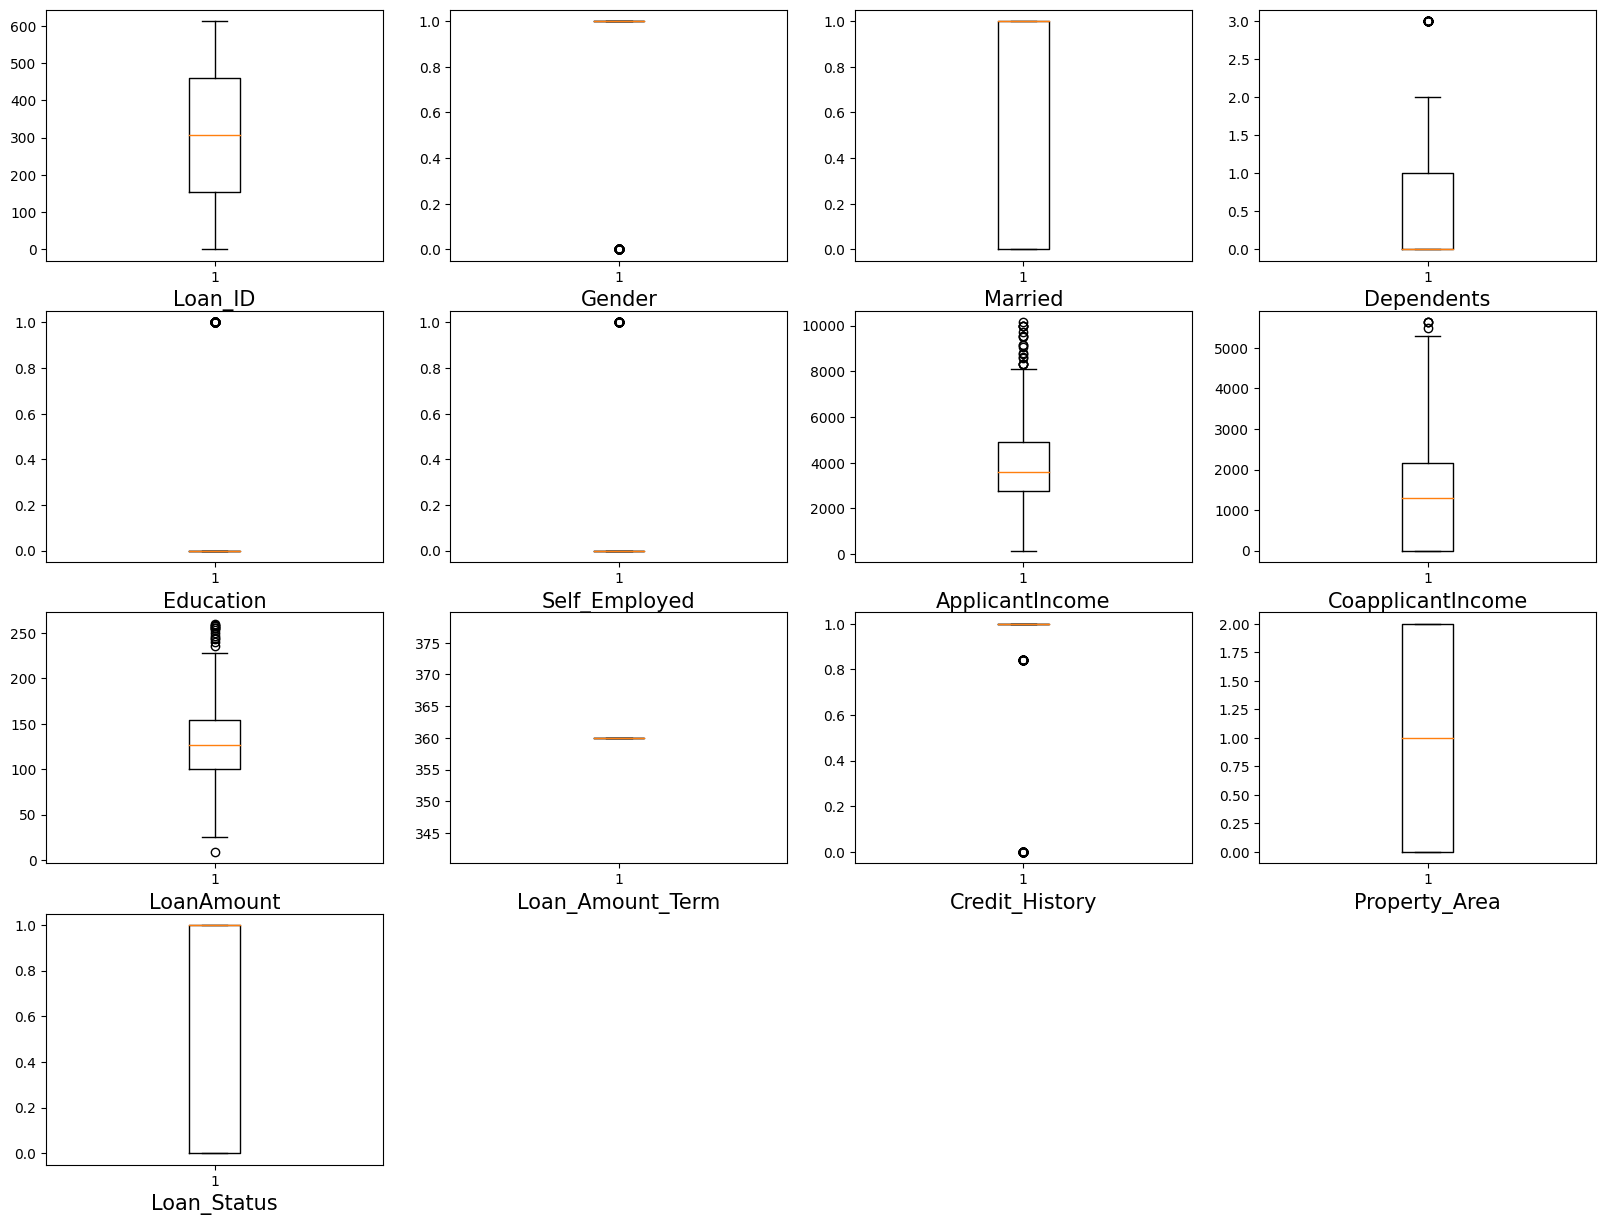

In [64]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
  if plotnumber <= 14:
    ax = plt.subplot(4,4,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1

plt.show()

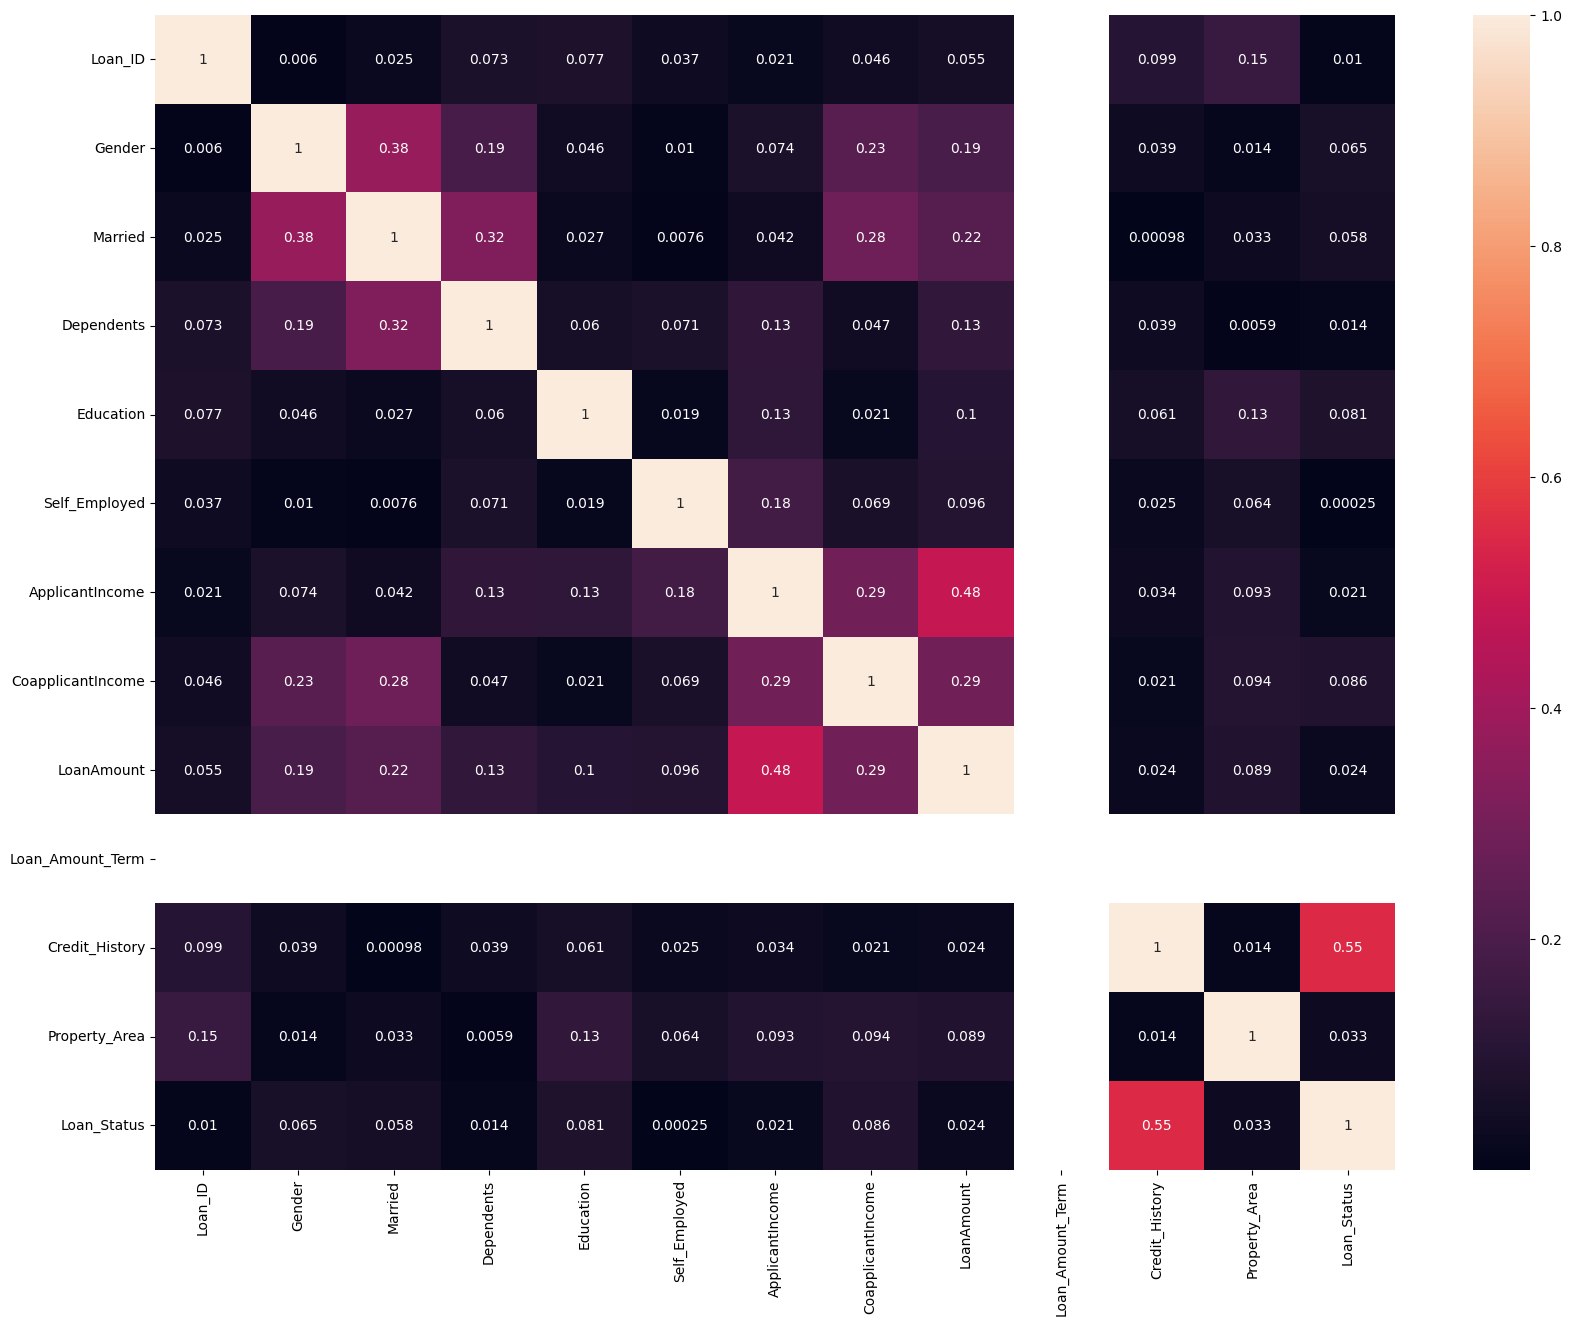

In [65]:
corr = df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
x = df.drop(columns='Loan_Status')

y = df['Loan_Status']

In [68]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

In [73]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

0.8202247191011236

In [74]:
confusion_matrix(y_test,lr_pred)

array([[ 9, 16],
       [ 0, 64]])

In [75]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test,dt_pred)

accuracy

0.6966292134831461

In [77]:
confusion_matrix(y_test,dt_pred)

array([[14, 11],
       [16, 48]])

In [78]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

0.7865168539325843

In [80]:
confusion_matrix(y_test,rf_pred)

array([[ 9, 16],
       [ 3, 61]])

In [81]:
svc = SVC()

svc.fit(x_train,y_train)

svc_pred = svc.predict(x_test)

In [82]:
accuracy = accuracy_score(y_test,svc_pred)

accuracy

0.8202247191011236

In [83]:
confusion_matrix(y_test,svc_pred)

array([[ 9, 16],
       [ 0, 64]])

In [84]:
#  import pickle

#  pickle.dump(rf,open('rf_cl_LoanPrediction','wb'))